![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadística
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [157]:
beer = pd.read_csv("data/datasets_beers.csv")
beer


,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...,...
2405,2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [158]:

beer.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


### El dataset contiene 2,410 filas y 8 columnas:

- Unnamed: 0: Parece un índice innecesario.

- abv: Contenido de alcohol por volumen (ABV), con algunos valores nulos.

- ibu: Índice de amargor (IBU), con muchos valores nulos.

- id: Identificador único de la cerveza.

- name: Nombre de la cerveza.

- style: Estilo de la cerveza, con pocos valores nulos.

- brewery_id: Identificador de la cervecería.

- ounces: Tamaño de la lata/botella en onzas.

In [159]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


In [160]:
beer.describe()

,Unnamed: 0,abv,ibu,id,brewery_id,ounces
count,2410.000000,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,1204.500000,0.059773,42.713167,1431.113278,231.749793,13.592241
std,695.851397,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.000000,0.001000,4.000000,1.000000,0.000000,8.400000
25%,602.250000,0.050000,21.000000,808.250000,93.000000,12.000000
50%,1204.500000,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,1806.750000,0.067000,64.000000,2075.750000,366.000000,16.000000
max,2409.000000,0.128000,138.000000,2692.000000,557.000000,32.000000


In [161]:
# cuantos nulos tiene

print(beer.isnull().sum())


Unnamed: 0       0
abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64


## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [162]:
beer.drop(columns=["Unnamed: 0"], inplace=True)

beer


,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [163]:
# Con shape nos dice cuantas filas y cuantas columnas tiene el df
fil_cols = beer.shape
fil_cols

(2410, 7)

## Ejercicio 5
¿De qué tipo son los datos?

In [164]:
beer.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en un nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, cuartiles...

In [165]:
beer_resumen = beer.describe()
beer_resumen

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [166]:
beer["style"]

0                  American Pale Lager
1              American Pale Ale (APA)
2                         American IPA
3       American Double / Imperial IPA
4                         American IPA
                     ...              
2405                       Belgian IPA
2406          American Amber / Red Ale
2407                       Schwarzbier
2408           American Pale Ale (APA)
2409          American Amber / Red Ale
Name: style, Length: 2410, dtype: object

In [167]:
conteo_estilos = beer["style"].value_counts()

conteo_estilos

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Wheat Ale                           1
Grisette                            1
Flanders Oud Bruin                  1
Braggot                             1
Low Alcohol Beer                    1
Name: count, Length: 99, dtype: int64

In [168]:


""" # Tengo dudas en esta parte
styles = pd.Series(['IPA', 'Lager', 'Stout', 'IPA', 'Pilsner', 'Lager', 'IPA'])

# Para contar las ocurrencias de cada estilo
conteo_estilos = styles.value_counts()

print(conteo_estilos) """


" # Tengo dudas en esta parte\nstyles = pd.Series(['IPA', 'Lager', 'Stout', 'IPA', 'Pilsner', 'Lager', 'IPA'])\n\n# Para contar las ocurrencias de cada estilo\nconteo_estilos = styles.value_counts()\n\nprint(conteo_estilos) "

In [169]:
estilos_unicos = pd.Series(beer["style"].unique())
estilos_unicos

0                American Pale Lager
1            American Pale Ale (APA)
2                       American IPA
3     American Double / Imperial IPA
4                      Oatmeal Stout
                   ...              
95                        Chile Beer
96                          Grisette
97                Flanders Oud Bruin
98                           Braggot
99                  Low Alcohol Beer
Length: 100, dtype: object

In [170]:
# Contar las ocurrencias de cada estilo directamente desde la columna 'styles'
conteo_estilos = beer["style"].value_counts()

print(conteo_estilos)


style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Wheat Ale                           1
Grisette                            1
Flanders Oud Bruin                  1
Braggot                             1
Low Alcohol Beer                    1
Name: count, Length: 99, dtype: int64


## Ejercicio 8
1. Imprime por pantalla los registros desde el décimo hasta el vigésimo
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [171]:
# 1 registros desde el décimo hasta el vigésimo

registros = beer.iloc[9:21]
registros

,abv,ibu,id,name,style,brewery_id,ounces
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0


In [172]:
registros  = beer.iloc[9:20][['name', 'style', 'ounces']]

registros

,name,style,ounces
9,Cone Crusher,American Double / Imperial IPA,12.0
10,Sophomoric Saison,Saison / Farmhouse Ale,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,12.0
12,Garce Selé,Saison / Farmhouse Ale,12.0
13,Troll Destroyer,Belgian IPA,12.0
14,Bitter Bitch,American Pale Ale (APA),12.0
15,Ginja Ninja,Cider,12.0
16,Cherried Away,Cider,12.0
17,Rhubarbarian,Cider,12.0
18,BrightCider,Cider,12.0


## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [173]:
total_onzas = beer["ounces"].sum()

print(f"El total de onzas de todas las birras es: {total_onzas}")

El total de onzas de todas las birras es: 32757.3


## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [174]:
# 1 amargaor medio, lo hacemos con mean

promedio_ibu = beer["ibu"].mean().round(2)

print(f"El promedio de IBUs de todas las cervezas es: {promedio_ibu}")

# Obtener el valor máximo de IBUs, con max
max_ibu = beer["ibu"].max()

# Obtener el valor mínimo de IBUs, con min
min_ibu = beer["ibu"].min()

print(f"El valor máximo de IBU es: {max_ibu}")
print(f"El valor mínimo de IBU es: {min_ibu}")

# que cerveza tiene el amargor mmáximo y amargor mínimo
# Buscamos el índice de la cerveza con el amargor máximo
indice_max_ibu = beer["ibu"].idxmax()

# Buscamos el índice de la cerveza con el amargor mínimo
indice_min_ibu = beer["ibu"].idxmin()

# Con loc 
cerveza_max_ibu = beer.loc[indice_max_ibu]
cerveza_min_ibu = beer.loc[indice_min_ibu]

print(f"La cerveza con el amargor máximo es: {cerveza_max_ibu['name']} con {cerveza_max_ibu['ibu']} IBU")
print(f"La cerveza con el amargor mínimo es: {cerveza_min_ibu['name']} con {cerveza_min_ibu['ibu']} IBU")


El promedio de IBUs de todas las cervezas es: 42.71
El valor máximo de IBU es: 138.0
El valor mínimo de IBU es: 4.0
La cerveza con el amargor máximo es: Bitter Bitch Imperial IPA con 138.0 IBU
La cerveza con el amargor mínimo es: Summer Solstice con 4.0 IBU


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [175]:
# Desviación estándar (std): Mide la cantidad de variabilidad o dispersión de los datos respecto a la media.
# Cuanto mayor sea la desviación estándar, más dispersos están los datos.

# Rango intercuartílico (IQR): Es la diferencia entre el percentil 75 (Q3) y el percentil 25 (Q1).
# Este valor mide la dispersión del 50% central de los datos y es menos sensible a valores extremos o outliers.

# Necesito la min, max, media, mediana
# La media dividido por 100

# Calcular la desviación estándar
# desviacion_estandar = beer['ibu'].std().round(2)

# # Calcular el rango intercuartílico (IQR)
# iqr = beer['ibu'].quantile(0.75) - beer['ibu'].quantile(0.25)

# print(f"La desviación estándar de los valores de IBU es: {desviacion_estandar}")
# print(f"El rango intercuartílico (IQR) de los valores de IBU es: {iqr}")

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonamiento mediante un gráfico

                 abv       ibu        id  brewery_id    ounces
abv         1.000000  0.670621  0.042811   -0.098632  0.172529
ibu         0.670621  1.000000  0.000485   -0.004875  0.054691
id          0.042811  0.000485  1.000000   -0.504030  0.100843
brewery_id -0.098632 -0.004875 -0.504030    1.000000 -0.133762
ounces      0.172529  0.054691  0.100843   -0.133762  1.000000


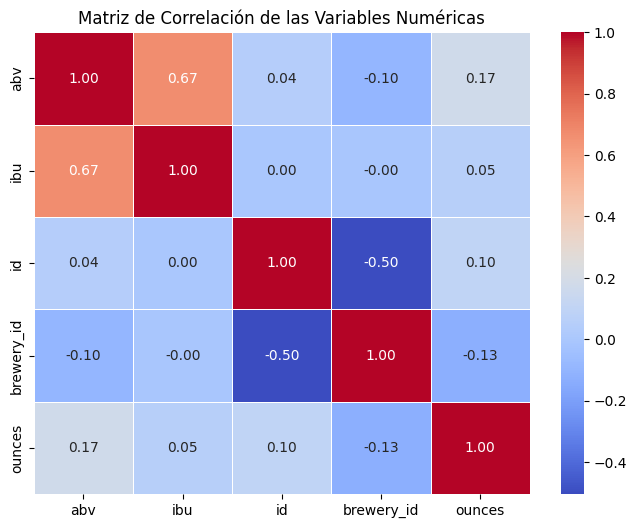

In [ ]:
# Selecciona solo las columnas numéricas
beer_numeric = beer.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo con las columnas numéricas
correlation_matrix = beer_numeric.corr()

# Matriz de correlación
print(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Título y etiquetas
plt.title('Matriz de Correlación de las Variables Numéricas')
plt.show()



## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

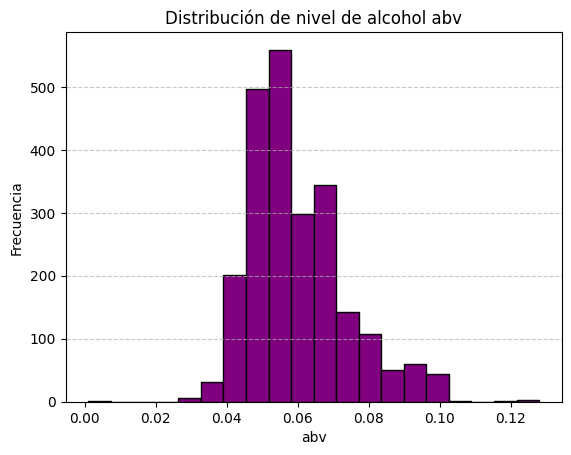

In [197]:
plt.hist(beer["abv"], bins=20, color='purple', edgecolor='black')

# Agregar título y etiquetas
plt.title('Distribución de nivel de alcohol abv')
plt.xlabel('abv')
plt.ylabel('Frecuencia') 
plt.grid(axis="y", linestyle = "--", alpha=0.7)
# Mostrar el gráfico
plt.show()

##### Se trata de una distribución simétrica.

Asimetria a la derecha

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

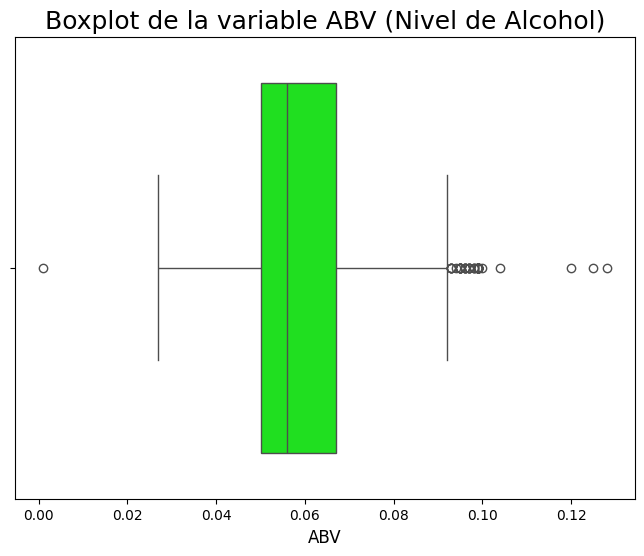

In [196]:
# Crear el boxplot de la variable 'abv'
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(x=beer["abv"], color='lime')

# Añadir título y etiquetas
plt.title('Boxplot de la variable ABV (Nivel de Alcohol)', fontsize=18)
plt.xlabel('ABV', fontsize=12)

# Mostrar el gráfico
plt.show()

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra también la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

## Ejercicio 18
Junta los dos datasets que tienes

## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

## Ejercicio 23
Consigue en un DataFrame de todas las cervezas en cuyas cervecerías al menos haya una cerveza con un `abv` mínimo 0.07.

In [ ]:
# todas las cervezas, que venda una cervecería, donde al menos una de ellas sea de 0.07 para arriba

## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [ ]:
# Las cervezas que se encuentran en aquellos estados, cuya media de amargor, sea superior a la media de amargor total